<center><h1>Ye_Jinyi_HW1</h1></center>
<center><font size="3">Github: angelayejinyi</font></center>
<center><font size="3">ID: 1552624974</font></center>
<br>
<center><font size="4">Vertebral Column Data</font></center>

### (a) Download Data

Package imports

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Get the Vertebral Column Data Set

In [2]:
data = arff.loadarff('../data/vertebral_column_data/column_2C_weka.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].apply(lambda x: x.decode())
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


### (b) Pre-Processing and Exploratory Data Analysis

#### i. Scatterplots

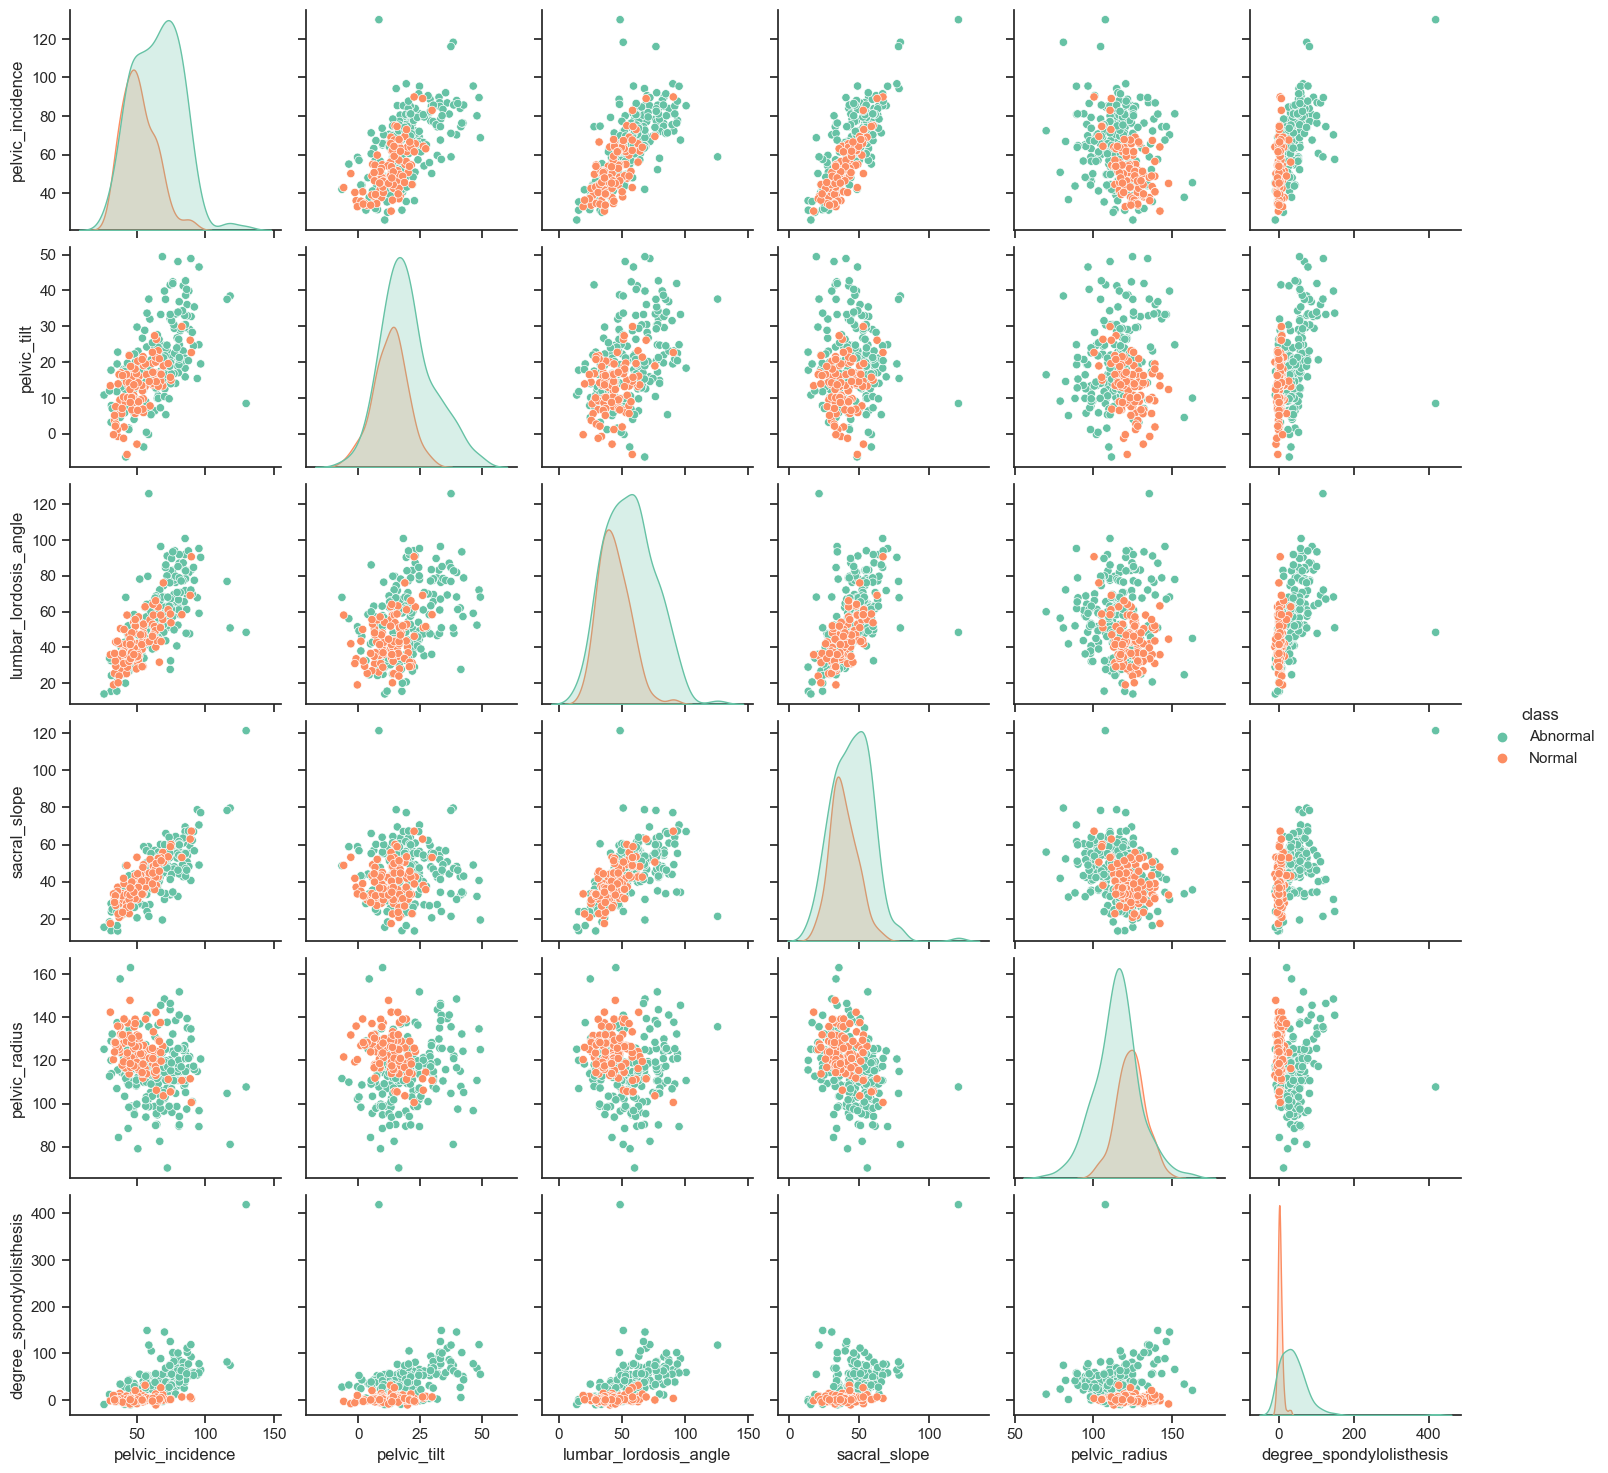

In [3]:
sns.set_theme(style="ticks")
sns.pairplot(df, hue="class", palette="Set2")
plt.show()

#### ii. Boxplots

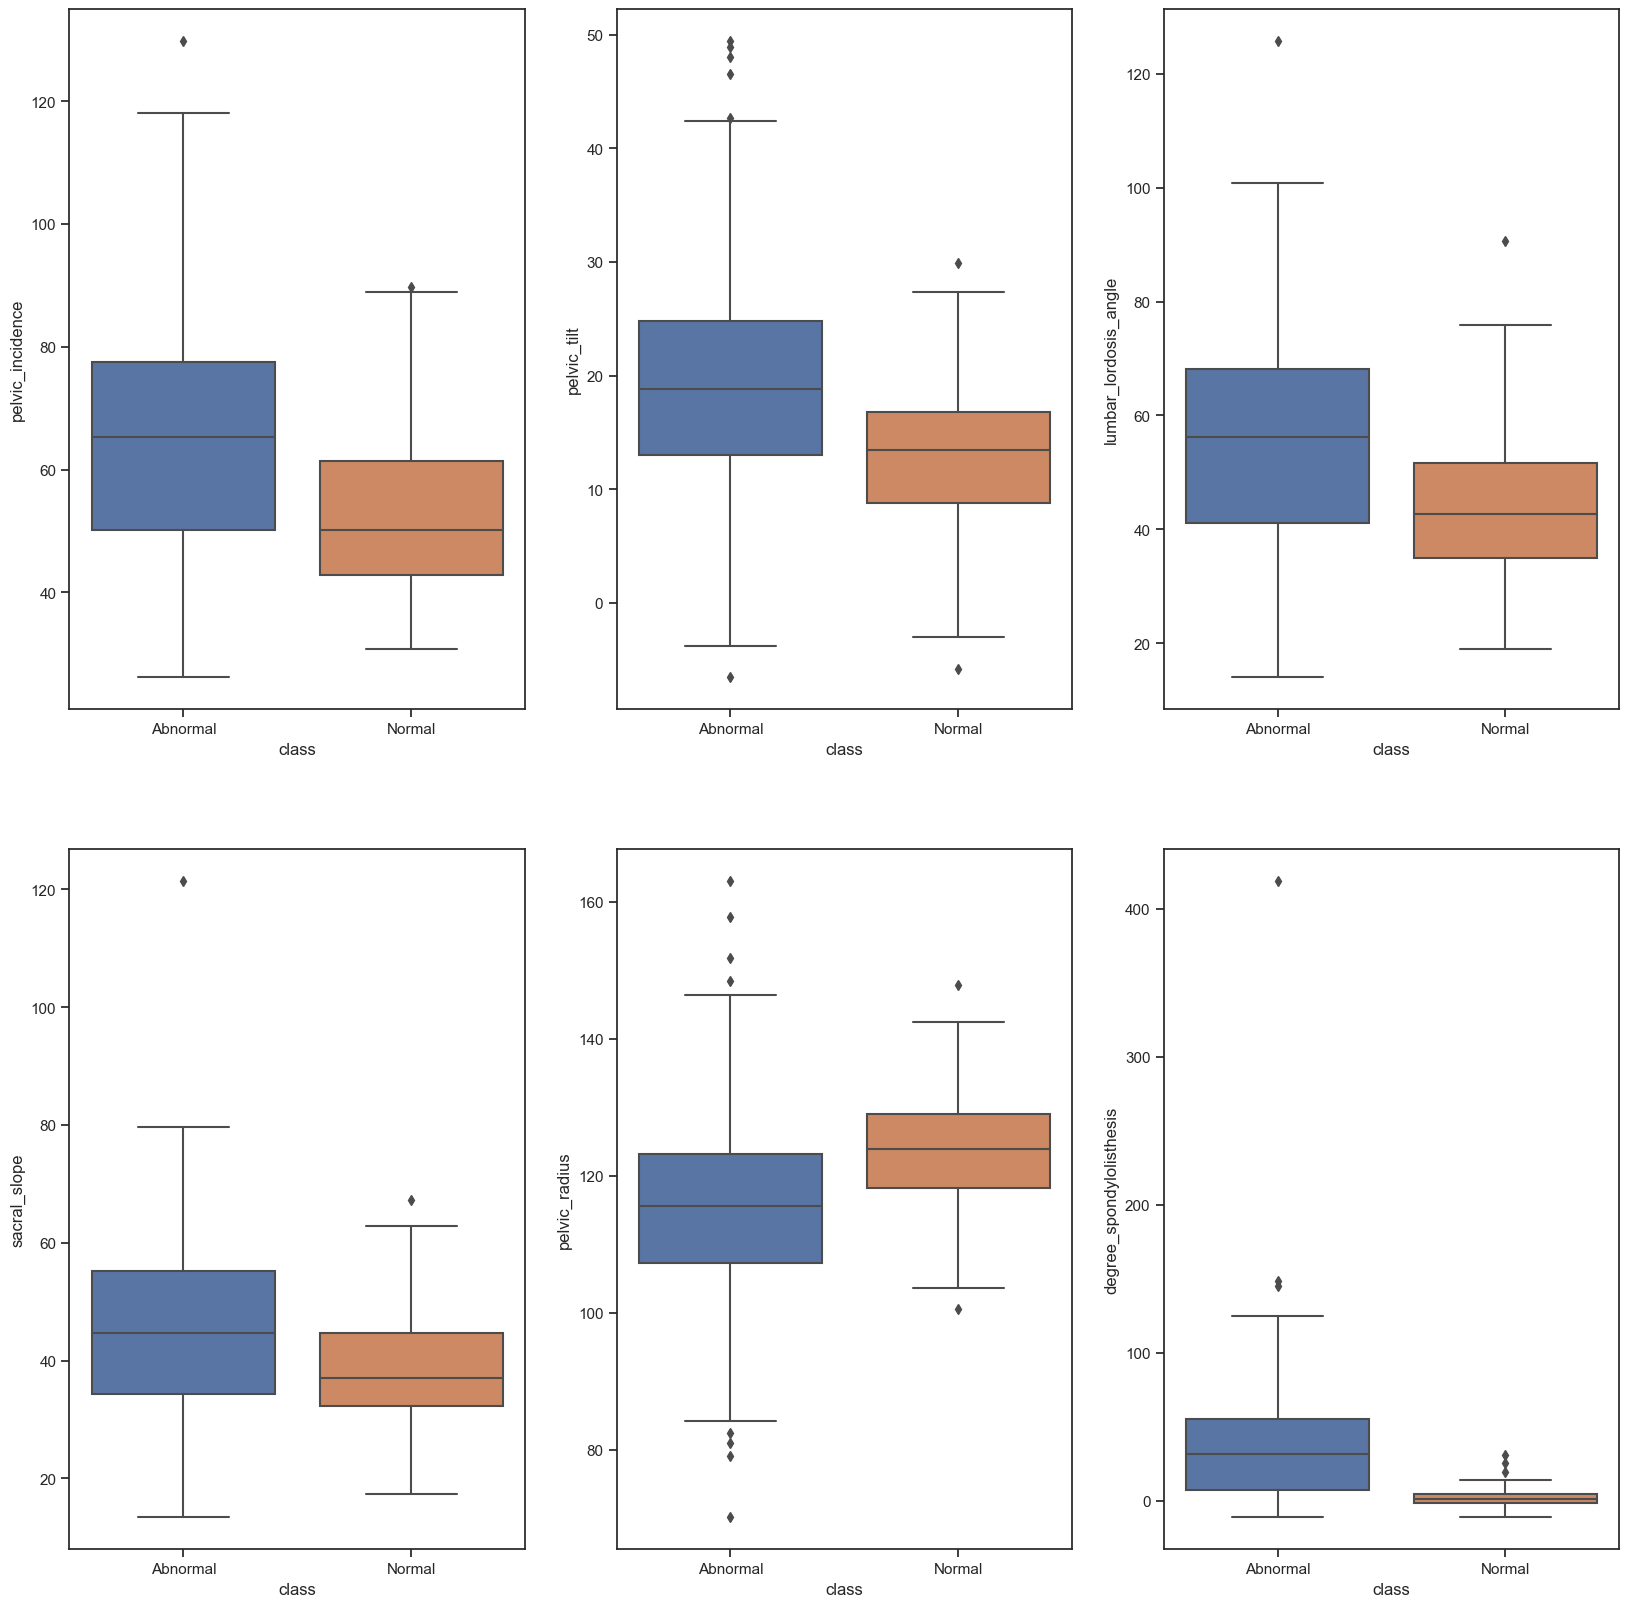

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(20, 20))
column_names = ["pelvic_incidence", "pelvic_tilt", "lumbar_lordosis_angle", 
         "sacral_slope", "pelvic_radius", "degree_spondylolisthesis"]
for i in range(6):
    sns.boxplot(x="class", y=column_names[i], data=df, ax=axes[i // 3, i % 3])
plt.show()

#### iii. Split Data Set

We are using the original dataset without scaling or normalization as the assignment does not explicitly ask us to do so. Yet, scaling the data yields similar results.

In [5]:
# set class labels to NO=0, AB=1
df['class_label'] = np.where(df['class']=='Abnormal', 1, 0) 

# split train and test datasets
y = df['class_label']
X = df.drop(['class_label'], axis = 1).drop(['class'], axis = 1)

X_train = X.iloc[np.r_[:140, 210:280]].reset_index(drop=True)
X_test = X.iloc[np.r_[140:210, 280:310]].reset_index(drop=True)
y_train = y.iloc[np.r_[:140, 210:280]].reset_index(drop=True)
y_test = y.iloc[np.r_[140:210, 280:310]].reset_index(drop=True)

# # scale the train data
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

### (c) Classification

#### i. Euclidean Metric

In [6]:
knn_classifier = KNeighborsClassifier(metric='euclidean')

#### ii. Test Data

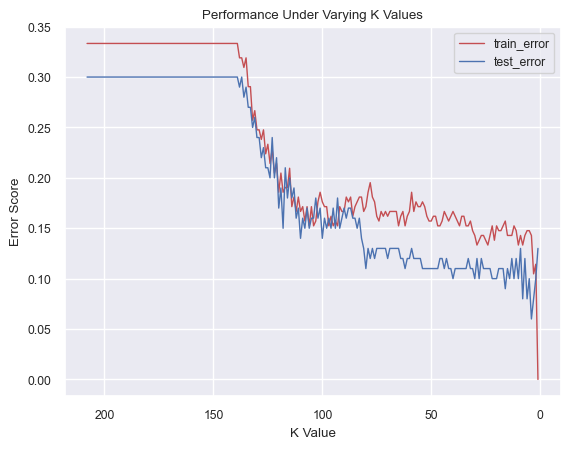

In [7]:
# testing different values of k
euc_k_value = []
euc_train_error_lst = []
euc_test_error_lst = []

for k in range(208, 0, -1):
    knn_classifier.n_neighbors = k
    knn_classifier.fit(X_train, y_train)
    train_error = 1 - knn_classifier.score(X_train,y_train)
    test_error = 1 - knn_classifier.score(X_test,y_test)
    euc_train_error_lst.append(train_error)
    euc_test_error_lst.append(test_error)
    euc_k_value.append(k)

sns.set_style('darkgrid')
sns.set(font_scale=0.8)
lineplot = sns.lineplot(x = euc_k_value, y = euc_train_error_lst, color='r', lw=1)
lineplot = sns.lineplot(x = euc_k_value, y = euc_test_error_lst, color='b', lw=1)
lineplot.set(xlabel='K Value', ylabel='Error Score', title='Performance Under Varying K Values')
lineplot.invert_xaxis()
plt.legend(labels=['train_error','test_error'])
plt.show()

In [8]:
# finding the most suitable k*
euc_min_index = euc_test_error_lst.index(min(euc_test_error_lst))
euc_k_star = euc_k_value[euc_min_index]
print('The best k* for euclidean distance is', euc_k_star)
print('Minimum test error for euclidean distance is:', min(euc_test_error_lst))

The best k* for euclidean distance is 4
Minimum test error for euclidean distance is: 0.06000000000000005


We can see that the most suitable k=k* under Euclidean distance is 4. The test error is 0.06.

Set k* = 4
Confusion matrix:
 [[25  5]
 [ 1 69]]


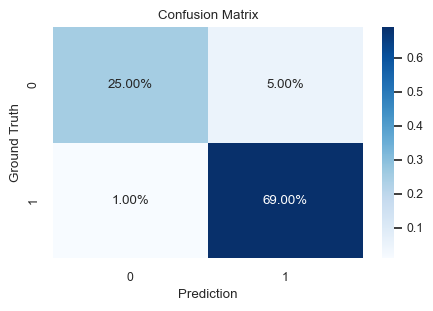

True Positive rate:  0.8333333333333334
True Negative rate:  0.9857142857142858
Precision:  0.9615384615384616
F1 score: 0.8928571428571429


In [9]:
# Confusion matrix, true positive rate, true negative rate, precision, and F1-score when k=4
knn_classifier.n_neighbors = euc_k_star
knn_classifier.fit(X_train, y_train)
y_pred = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print('Set k* =', euc_k_star)
print('Confusion matrix:\n', cm)

fig, axe = plt.subplots(1, 1, figsize=(5,3))
sns.heatmap((cm / np.sum(cm)), annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.show()

TP = cm[(0,0)]
FP = cm[(1,0)]
TN = cm[(1,1)]
FN = cm[(0,1)]
true_positive_rate = TP/(TP+FN)
true_negative_rate = TN/(TN+FP)
precision = TP/(TP+FP)
f1_score = 2*precision*true_positive_rate/(precision+true_positive_rate)

print('True Positive rate: ',true_positive_rate)
print('True Negative rate: ',true_negative_rate)
print('Precision: ', precision)
print('F1 score:', f1_score)

#### iii. Learning Curve

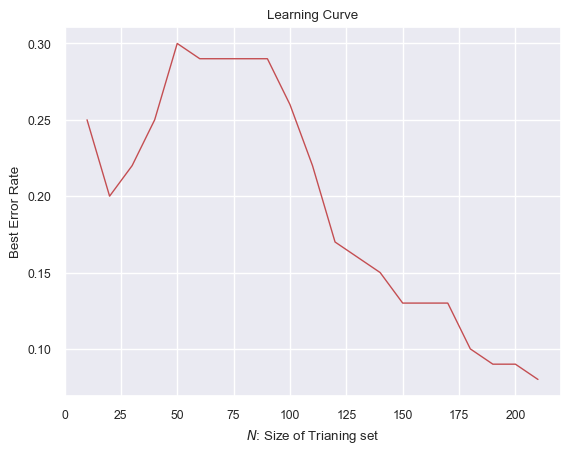

In [10]:
n_value = []
min_test_error_lst = []

for n in range(10, 211, 10):
    # split the dataset
    X_train_n = X_train.iloc[np.r_[:n-math.floor(n/3), 140:140+math.floor(n/3)]].reset_index(drop=True)
    y_train_n = y_train.iloc[np.r_[:n-math.floor(n/3), 140:140+math.floor(n/3)]].reset_index(drop=True)

    # test different k values
    k_value = []
    test_error_lst = []
    for k in range(1, n+1, 5):
        knn_classifier.n_neighbors = k
        knn_classifier.fit(X_train_n, y_train_n)
        test_error = 1 - knn_classifier.score(X_test, y_test)
        test_error_lst.append(test_error)
        k_value.append(k)

    # find the best k* for each n
    min_test_error = min(test_error_lst)
    min_test_error_lst.append(min_test_error)
    n_value.append(n)

# plot the learning curve
sns.set_style('darkgrid')
sns.set(font_scale=0.8)
lineplot = sns.lineplot(x = n_value, y = min_test_error_lst, color='r', lw=1)
lineplot.set(xlabel='$N$: Size of Trianing set', ylabel='Best Error Rate', title='Learning Curve')
plt.show()

### (d) Other Metrics

#### i. Minkowski Distance.

##### A. Manhattan Distance with p = 1.

The best k* for Manhattan distance is [1, 6, 11, 26]
Minimum test error for Manhattan distance is: 0.10999999999999999


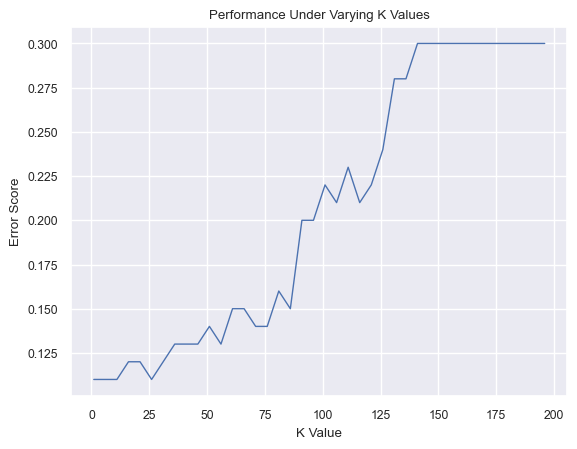

In [11]:
# find the best k*
man_k_value = []
man_test_error_lst = []

for k in range(1, 197, 5):
    clf_man = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    clf_man.fit(X_train, y_train)
    test_error = 1 - clf_man.score(X_test,y_test)
    man_test_error_lst.append(test_error)
    man_k_value.append(k)

min_index = [i for i in range(len(man_test_error_lst)) if man_test_error_lst[i] == min(man_test_error_lst)]
k_star_man = [man_k_value[i] for i in min_index]

print('The best k* for Manhattan distance is', k_star_man)
print('Minimum test error for Manhattan distance is:', min(man_test_error_lst))

sns.set_style('darkgrid')
sns.set(font_scale=0.8)
lineplot = sns.lineplot(x = man_k_value, y = man_test_error_lst, color='b', lw=1)
lineplot.set(xlabel='K Value', ylabel='Error Score', title='Performance Under Varying K Values')
plt.show()

When using **Manhattan Distance** as metric, the best performance of **0.11** error rate occurs at $k = 1, 6, 11, 26$.

##### B. With log10(p) in {0.1, 0.2, 0.3, ... ,1}.

In [12]:
log10_p_lst = []
test_error_lst = []

for i in k_star_man:
    for log10_p in np.arange(0.1, 1.1, 0.1):
        p = 10 ** log10_p
        clf_min = KNeighborsClassifier(metric='minkowski', p=p, n_neighbors=i)
        clf_min.fit(X_train, y_train)
        test_error = 1 - clf_min.score(X_test,y_test)
        test_error_lst.append(test_error)
        log10_p_lst.append(log10_p)
        min_index = test_error_lst.index(min(test_error_lst))
        log10_p_star = log10_p_lst[min_index]
    print('When k =', i, ', the best log10(p) for Minkowski distance is', log10_p_star)
    print('When k =', i, ', Minimum test error for Minkowski distance is:', min(test_error_lst))



When k = 1 , the best log10(p) for Minkowski distance is 0.7000000000000001
When k = 1 , Minimum test error for Minkowski distance is: 0.10999999999999999
When k = 6 , the best log10(p) for Minkowski distance is 0.6
When k = 6 , Minimum test error for Minkowski distance is: 0.06000000000000005
When k = 11 , the best log10(p) for Minkowski distance is 0.6
When k = 11 , Minimum test error for Minkowski distance is: 0.06000000000000005
When k = 26 , the best log10(p) for Minkowski distance is 0.6
When k = 26 , Minimum test error for Minkowski distance is: 0.06000000000000005


When using **Minkowski Distance** as metric, the best performance of **0.06** error rate occurs at $k = 6, 11, 26, log(10)p = 0.6$.

##### C. Chebyshev Distance With p -> infinity.

In [13]:
# find the best k*
k_value = []
test_error_lst = []

for k in range(1, 197, 5):
    clf_cheb = KNeighborsClassifier(metric='chebyshev')
    clf_cheb.n_neighbors = k
    clf_cheb.fit(X_train, y_train)
    test_error = 1 - clf_cheb.score(X_test,y_test)
    test_error_lst.append(test_error)
    k_value.append(k)

min_index = test_error_lst.index(min(test_error_lst))
k_star = k_value[min_index]

print('The best k* for Chebyshev distance is', k_star)
print('Minimum test error for Chebyshev distance is:', min(test_error_lst))

The best k* for Chebyshev distance is 16
Minimum test error for Chebyshev distance is: 0.07999999999999996


When using **Chebyshev Distance** as metric, the best performance of **0.08** error rate occurs at $k = 16$.

#### ii. Mahalanobis Distance.

The best k* for Mahalanobis distance is 1
Minimum test error for Mahalanobis distance is: 0.14


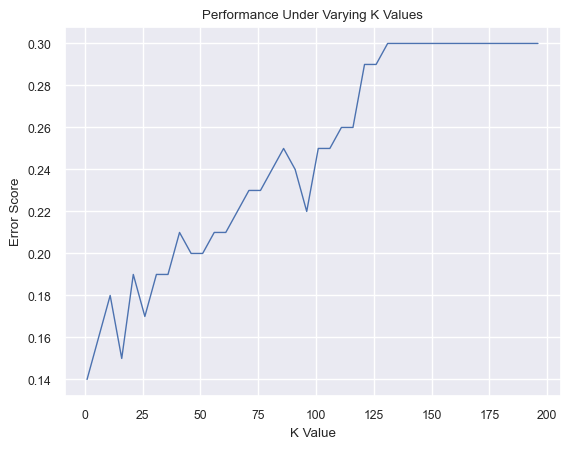

In [14]:
k_value = []
test_error_lst = []

for k in range(1, 197, 5):
    clf_mah = KNeighborsClassifier(n_neighbors = k, metric = 'mahalanobis', 
        metric_params = {'VI': np.linalg.inv(np.cov(X_train, rowvar=False)) })
    clf_mah.fit(X_train, y_train)
    test_error = 1 - clf_mah.score(X_test,y_test)
    test_error_lst.append(test_error)
    k_value.append(k)

min_index = test_error_lst.index(min(test_error_lst))
k_star = k_value[min_index]

print('The best k* for Mahalanobis distance is', k_star)
print('Minimum test error for Mahalanobis distance is:', min(test_error_lst))

sns.set_style('darkgrid')
sns.set(font_scale=0.8)
lineplot = sns.lineplot(x = k_value, y = test_error_lst, color='b', lw=1)
lineplot.set(xlabel='K Value', ylabel='Error Score', title='Performance Under Varying K Values')
plt.show()
    

When using **Mahalanobis Distance** as metric, the best performance of **0.14** error rate occurs at $k = 1$.

#### iii. Show the results in a table.

In [15]:
summary_data = {'Distance':['Euclidean', 'Manhattan', 'Minkowski', 'Chebyshev', 'Mahalanobis'],
                'Optimal K':[4, [1,6,11,26], 6, 16, 1],
                'Error Rate':[0.06, 0.11, 0.06, 0.08, 0.14],
               }
summary_df = pd.DataFrame(data=summary_data)
summary_df

,Distance,Optimal K,Error Rate
0,Euclidean,4,0.06
1,Manhattan,"[1, 6, 11, 26]",0.11
2,Minkowski,6,0.06
3,Chebyshev,16,0.08
4,Mahalanobis,1,0.14


### (e) Weighted Decision

In [16]:
k_value = []
euc_test_error_lst = []
man_test_error_lst = []
cheb_test_error_lst = []

for k in range(1, 197, 5):
    k_value.append(k)

    # Euclidean Distance
    euc_clf = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = 'euclidean')
    euc_clf.fit(X_train, y_train)
    euc_test_error = 1 - euc_clf.score(X_test,y_test)
    euc_test_error_lst.append(euc_test_error)

    # Manhattan Distance
    man_clf = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = 'manhattan')
    man_clf.fit(X_train, y_train)
    man_test_error = 1 - man_clf.score(X_test,y_test)
    man_test_error_lst.append(man_test_error)

    # Chebyshev Distance
    cheb_clf = KNeighborsClassifier(n_neighbors=k, weights='distance', metric = 'chebyshev')
    cheb_clf.fit(X_train, y_train)
    cheb_test_error = 1 - cheb_clf.score(X_test,y_test)
    cheb_test_error_lst.append(cheb_test_error)


euc_min_index = [i for i in range(len(euc_test_error_lst)) if euc_test_error_lst[i] == min(euc_test_error_lst)]
euc_k_star = [k_value[i] for i in euc_min_index]
man_min_index = [i for i in range(len(man_test_error_lst)) if man_test_error_lst[i] == min(man_test_error_lst)]
man_k_star = [k_value[i] for i in man_min_index]
cheb_min_index = [i for i in range(len(cheb_test_error_lst)) if cheb_test_error_lst[i] == min(cheb_test_error_lst)]
cheb_k_star = [k_value[i] for i in cheb_min_index]

summary_data = {'Distance':['Euclidean', 'Manhattan', 'Chebyshev'],
                'Optimal K':[euc_k_star, man_k_star, cheb_k_star],
                'Error Rate':[min(euc_test_error_lst), min(man_test_error_lst), min(cheb_test_error_lst)],
               }
summary_df = pd.DataFrame(data=summary_data)
summary_df

,Distance,Optimal K,Error Rate
0,Euclidean,[6],0.10
1,Manhattan,[26],0.10
2,Chebyshev,"[16, 31, 36, 41, 61]",0.11


### (f) Training Error Rate

The lowest training error is 0.0 when k=1, which means that when your test sample is in the training dataset, it'll choose itself as the closest and never make mistake.